# Минипроект 3

### Задачи:
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

### Описание данных:

user_data:

- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

logs:

- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

###### Задача 1:

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?


In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('~/karpov_hw/karpov_data/3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
user_data.shape

(2954, 3)

In [4]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
user_data.describe(include='all')

,client,premium,age
count,2954.000000,2954,2954.000000
unique,NaN,2,NaN
top,NaN,False,NaN
freq,NaN,2548,NaN
mean,50767.886594,NaN,44.196005
std,28800.505847,NaN,14.248336
min,40.000000,NaN,20.000000
25%,25639.500000,NaN,32.000000
50%,51569.500000,NaN,44.000000
75%,75963.250000,NaN,56.000000


In [7]:
logs = pd.read_csv('~/karpov_hw/karpov_data/3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [8]:
logs.shape

(4500, 4)

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [10]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [11]:
logs.describe(include='all')

,client,success,platform,time
count,4500.000000,4500,4500,4.500000e+03
unique,NaN,2,3,NaN
top,NaN,True,phone,NaN
freq,NaN,3289,2753,NaN
mean,50998.758000,NaN,NaN,1.585440e+09
std,28374.472495,NaN,NaN,2.314866e+04
min,40.000000,NaN,NaN,1.585400e+09
25%,27056.500000,NaN,NaN,1.585420e+09
50%,52659.000000,NaN,NaN,1.585440e+09
75%,76001.250000,NaN,NaN,1.585461e+09


In [12]:
logs.platform.nunique()

3

###### Задача 2

Какой клиент совершил больше всего успешных операций?

In [13]:
# ссоздаём Series success_count, где индекс - id клиента, а значения - количество успешных операций
# метод value_counts() автоматически сортирует значения по убыванию
success_count = logs[logs.success==True].client.value_counts()
success_count

52870    41
61473    41
92584    41
12179    41
82563    41
         ..
27995     1
40285     1
1374      1
77857     1
51199     1
Name: client, Length: 2845, dtype: int64

In [14]:
max_success_count = success_count.max() #находим значение наибольшего количества успешных операциий у одного клиента
max_success_client = success_count[success_count==max_success_count] #выбираем в success_count максимальные значения 
max_success_client.index #выводим id клиентов с наибольшим количеством успешных операций

Int64Index([52870, 61473, 92584, 12179, 82563, 28719, 61468, 78349, 36165], dtype='int64')

###### Задача 3

С какой платформы осуществляется наибольшее количество успешных операций?

In [15]:
logs[logs.success==True].platform.value_counts().idxmax()

'phone'

###### Задача 4

Какая платформа наиболее популярна среди премиумных клиентов?

In [16]:
logs.merge(user_data, how='inner', on='client').query('premium==True').platform.value_counts().idxmax()

'phone'

###### Задача 5

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
logs_client = logs.merge(user_data, how='inner', on='client')
premium_age = logs_client[['premium', 'age']]
premium_age

,premium,age
0,False,25
1,False,25
2,False,25
3,False,25
4,False,25
...,...,...
3434,False,36
3435,False,67
3436,False,66
3437,False,33


In [19]:
premium_age.age.describe()

count    3439.000000
mean       44.222448
std        14.692909
min        20.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        69.000000
Name: age, dtype: float64

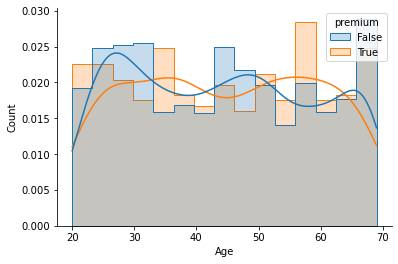

In [20]:
a = sns.histplot(premium_age, x='age', hue='premium', element='step', stat='density', common_norm=False, kde=True)
a.set(xlabel='Age', ylabel='Count')
sns.despine()
plt.show()

###### Задача 6

Постройте график распределения числа успешных операций: 

- x – число успешных операций
- y – число клиентов, совершивших столько успешных операций

In [21]:
logs_client

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [22]:
client_success_count = logs_client[logs_client.success==True].client.value_counts()

In [23]:
client_success_count

61468    41
61473    41
82563    41
78349    41
28719    41
         ..
40285     1
27995     1
29580     1
87382     1
40954     1
Name: client, Length: 2104, dtype: int64

In [24]:
client_success_count.value_counts()

1     2051
2       42
41       9
40       1
3        1
Name: client, dtype: int64

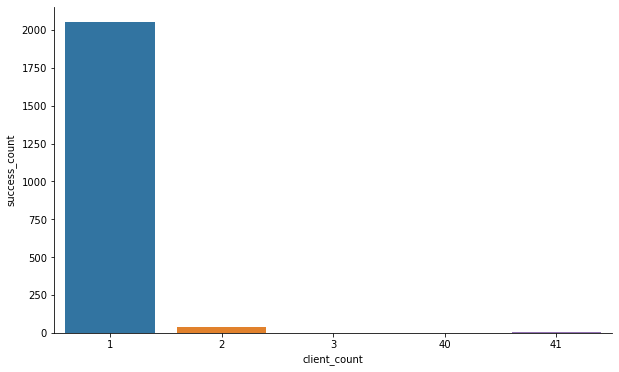

In [31]:
plt.figure(figsize=(10, 6))
a = sns.countplot(x=client_success_count)
a.set(xlabel='client_count', ylabel='success_count')
sns.despine()
plt.show()

###### Задача 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [44]:
computer_success_age = logs_client[(logs_client.platform=='computer') & (logs_client.success==True)].age

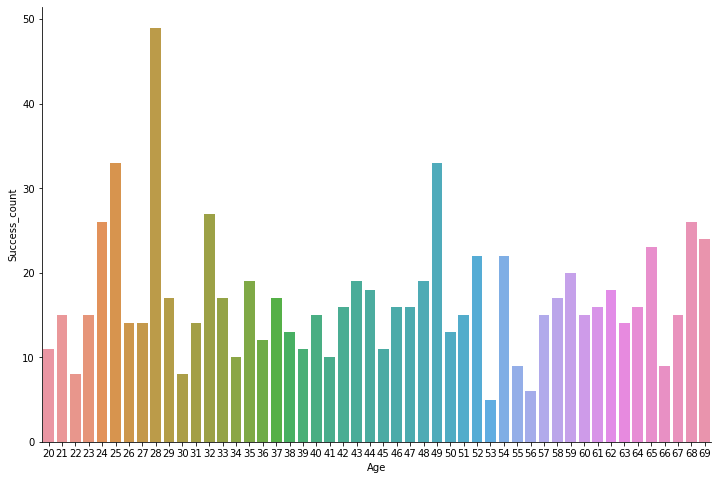

In [46]:
plt.figure(figsize=(12,8))
a = sns.countplot(x=computer_success_age)
a.set(xlabel='Age', ylabel='Comp_success_count')
sns.despine()
plt.show()